In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [19]:
VGG_model = load_model('../../model/my_files/top_up_VGG.h5')


In [20]:
alphabet = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']

In [21]:
# loading a test image for ASL sign 'C'
image_path = '../../model/tm_images/V-samples/16.jpg'
image = cv2.imread(image_path)



In [22]:
image = cv2.resize(image, (64, 64))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [23]:
image.shape


(64, 64, 3)

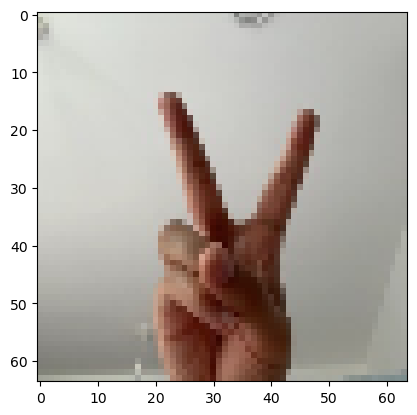

In [24]:
plt.imshow(image, cmap = 'gray')

In [9]:
test_img = image.reshape(1, 128, 128, 3)

In [10]:
soft_pred = VGG_model.predict(test_img)

2024-07-03 14:05:32.961760: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


ValueError: in user code:

    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/simybasra/anaconda3/envs/capstone_tf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 128, 128, 3)


In [11]:
pred_y = np.argmax(soft_pred, axis=1)

NameError: name 'soft_pred' is not defined

In [86]:
pred_y

array([20])

In [87]:
soft_pred


array([[1.7804522e-08, 2.9676768e-03, 1.1855816e-07, 2.5171920e-09,
        9.6110591e-07, 6.3148290e-03, 4.4742146e-07, 3.5620879e-08,
        4.1963138e-02, 3.3807999e-06, 2.9706465e-10, 1.3721364e-05,
        2.3880372e-07, 5.8341022e-05, 4.9784277e-10, 1.3049534e-09,
        8.1194425e-03, 3.1884996e-05, 1.7802520e-06, 7.8357727e-05,
        8.5793793e-01, 8.2413860e-02, 3.8424499e-09, 9.3893243e-05]],
      dtype=float32)

In [88]:
pred_y[0]

20

In [89]:
alphabet[pred_y[0]]

'v'